# Лабораторная работа №1 по СМАД

## Тема: ГЕНЕРАЦИЯ ЭКСПЕРИМЕНТАЛЬНЫХ ДАННЫХ ПО СХЕМЕ ИМИТАЦИОННОГО МОДЕЛИРОВАНИЯ НА ЭВМ

---

## Вариант 2

Информация о моделируемом объекте:

-   число факторов - 2
-   По первому фактору зависимость близка к линейной (возрастающей)
-   По второму фактору зависимость близка к параболической
-   Максимальное значение отклика приходится на граничные точки точки области действия факторов

## Задание:

1. Определить модель, область действия факторов, план эксперимента
2. Написать программу по генерации экспериментальных данных
3. Построить графики зависимости незашумленного отклика от входных факторов


Импортируем нужные библиотеки


In [ ]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

Задаем класс Модель

In [ ]:
class Model:

    def __init__(self):
        self.number_tests = 12
        self.x_max = 1
        self.x_min = -1
        self.x1 = []
        self.x2 = []
        self.signal = []
        self.response = []
        self.power = 0
        self.standart_deviation = 0
        self.func = lambda x1, x2: 1 + 4*x1 + 0.001 * x1 + 4 * x2 ** 2

    def add_couple(self, x1, x2):
        self.x1.append(x1)
        self.x2.append(x2)

    def compute_signal(self, i) -> float:
        x1 = self.x1[i]
        x2 = self.x2[i]
        signal = self.func(x1, x2)
        return signal

    def compute_standart_deviation(self) -> float:
        self.standart_deviation = self.power * 0.1

    def compute_power(self):
        avg_signal = [
            np.sum(self.signal) / len(self.signal)
            for i in range(len(self.signal))
        ]
        vec_avg_signal = np.array(avg_signal)
        power = np.vdot(self.signal - vec_avg_signal,
                        self.signal - vec_avg_signal) / len(self.signal)
        self.power = power

    def compute_response(self, error):
        self.response = self.signal + error


Создаем функции генерации случайных значений

In [ ]:
def generate_couple(x_min, x_max):
    x1 = np.random.uniform(x_min, x_max)
    x2 = np.random.uniform(x_min, x_max)
    return x1, x2


def generate_error(standart_deviation, number_tests) -> float:
    error = np.random.normal(0, standart_deviation, number_tests)
    return error

Заполняем модель данными

In [ ]:
model = Model()  # инициализируем модель

for _ in range(model.number_tests):
    x1, x2 = generate_couple(model.x_min, model.x_max)
    model.add_couple(x1, x2)

model.x1 = np.array(model.x1)
model.x2 = np.array(model.x2)

model.signal = np.array([
    model.compute_signal(i) for i in range(model.number_tests)
])
model.compute_power()
model.compute_standart_deviation()
error = generate_error(model.standart_deviation, model.number_tests)
model.compute_response(error)

Отрисовываем таблицу выборки

In [35]:
table = PrettyTable()
table.field_names = ["Num Test", "x1", "x2", "signal", "error", "response"]
for i in range(model.number_tests):
    table.add_row([i+1, np.around(model.x1[i], 7),
                   np.around(model.x2[i], 7),
                   np.around(model.signal[i], 7),
                   np.around(error[i], 7),
                   np.around(model.response[i], 7)])
print(table)


+----------+------------+------------+------------+------------+------------+
| Num Test |     x1     |     x2     |   signal   |   error    |  response  |
+----------+------------+------------+------------+------------+------------+
|    1     | 0.1710735  |  0.107585  | 1.7307631  | 0.5193643  | 2.2501274  |
|    2     | 0.8341734  | -0.4085474 | 5.0051718  | 0.1815039  | 5.1866757  |
|    3     | 0.6358155  | 0.5998205  | 4.9830365  | -0.6168136 | 4.3662229  |
|    4     | -0.7754463 | -0.6276987 | -0.5265379 |  0.008317  | -0.5182209 |
|    5     | -0.8070929 | -0.0660847 | -2.2117098 | 0.8967518  | -1.3149581 |
|    6     | -0.5329387 | -0.390172  | -0.5233512 | -0.2054777 | -0.7288289 |
|    7     | -0.3114693 | 0.8532747  | 2.6661223  | 0.3767714  | 3.0428937  |
|    8     | -0.034529  | 0.9275176  | 4.3030054  | -0.500519  | 3.8024865  |
|    9     | -0.3370702 | 0.2270167  | -0.1424717 |  -0.14079  | -0.2832617 |
|    10    | -0.8282649 | 0.0142367  | -2.3130773 | -0.8293411 |

Построение графиков зависимости незашумленного отклика от входных параметров

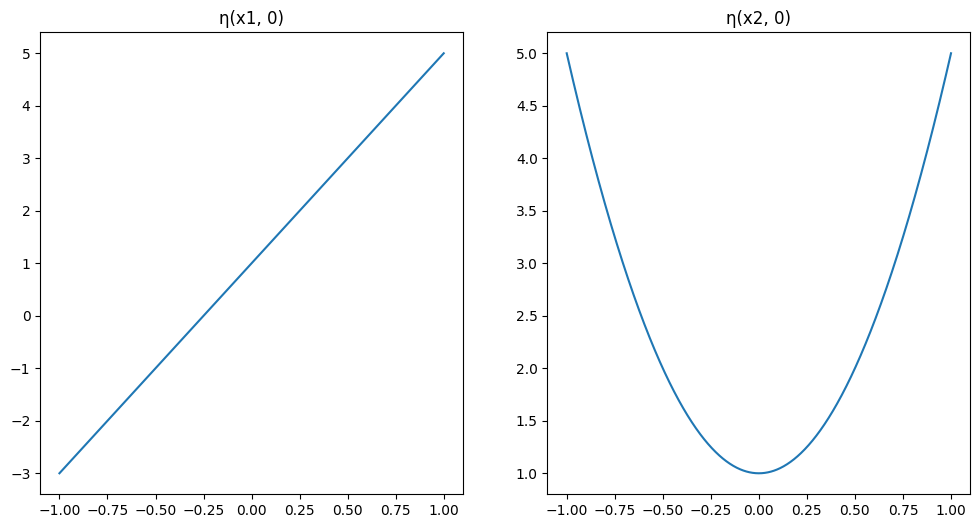

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(12)
ax_x1 = np.linspace(-1, 1, 1000)
ax_x2 = ax_x1
axes[0].set(title="η(x1, 0)")
axes[1].set(title="η(x2, 0)")
axes[0].plot(ax_x1, model.func(ax_x1, 0))
axes[1].plot(ax_x2, model.func(0, ax_x2))
plt.show()